# cross-validation

## Set up

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x, y = make_blobs(random_state=0)
x_train, x_test, y_train, y_test =   train_test_split(x, y, random_state=0, test_size=0.3)

logreg = LogisticRegression().fit(x_train, y_train)
print('test score \n{:.3f}'.format(logreg.score(x_test, y_test)))

test score 
0.900


* 데이터를 훈련 세트와 테스트 세트로 나누는 이유는  새로운 데이터에 모델이 얼마나 잘 일반화되는지 측정하기 위해서임  
* 모델이 훈련 세트에 잘 맞는 것보다 학습 과정에 없던 데이터에 대해 예측을 얼마나 잘하느냐가 중요  

* cross-validation교차검증은 데이터를 여러 번 반복해서 나누고 여러 모델을 학습  
보통 5 or 10을 사용  

* 5-겹 교차 검증을 하려면 먼저 fold폴드라고 하는 비슷한 크기의 'subset'다섯 개로 나누고, 모델들을 만듬  
* 첫 번째 모델은 첫 번째 fold를 테스트 세트로 사용하고 나머지 (2에서 5까지) fold를 훈련 세트로 사용하여 학습  
즉 이 모델은 fold 2~5까지의 데이터를 사용해 만들어지고 fold1을 사용해 정확도를 평가함

* 그 다음 두 번째 모델은 fold2를 테스트 세트로 사용하고 fold1, 3 ,4, 5의 데이터를 훈련 데이터로 사용 이런 방법으로 3, 4, 5를 테스트 세트로 사용해 반복  
* 이렇게 데이터를 훈련 세트와 테스트 세트로 나누는 다섯 번의 분할마다 정확도를 측정하여, 결국 다섯 개의 정확도 값을 얻게 됨

<Figure size 864x432 with 0 Axes>

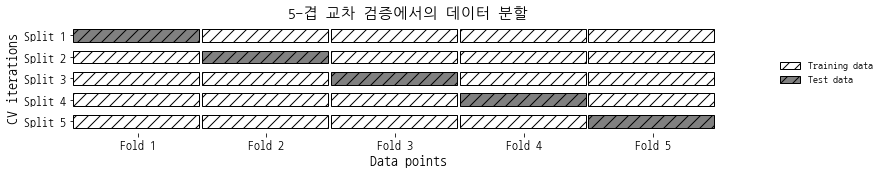

In [3]:
import mglearn
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
mglearn.plots.plot_cross_validation()
plt.title("5-겹 교차 검증에서의 데이터 분할")
plt.show()

## scikit-learn에서의 cross-validation(교차검증)

* scikit-learn에서 교차 검증은 model_selection 모듈의 cross_val_score 함수로 구현되어 있음  

### iris 데이터셋에 cross-validation을 간단하게 적용하기

* iris 데이터셋에 LogisticRegression을 평가해보면  

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# dataset
iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target, cv=5) # model, train, target, cross validation

print('cross-val-score \n{}'.format(scores))
print('cross-val-score.mean \n{:.3f}'.format(scores.mean()))

cross-val-score 
[1.         0.96666667 0.93333333 0.9        1.        ]
cross-val-score.mean 
0.960


* 교차 검증 평균값으로 우리는 이 모델의 정확도가 대략 96%일 것으로 기대할 수 있음  
* 5겹 교차 검증이 만든 5개의 값을 모두 보면 100%에서 90%까지 폴드에 따라 비교적 차이가 큼  
* 이는 모델이 훈련에 사용한 폴드에 매우 의존적이거나 데이터셋이 작기 때문일 수 있음  

교차 검증의 장점은 train_test_split와 비교해보면 train_test_split는 데이터를 무작위로 나눔. 데이터를 무작위로 나눌 때 

훈련 세트 ==>  분류하기 어려운 샘플  
테스트세트 ==> 분류하기 쉬운 샘플  

테스트 세트의 정확도는 비현실적으로 높게 나올 것  
반대의 경우라면 테스트 세트의 정확도는 비현실적으로 낮게 나옴  

그러나 교차 검증을 사용하면 테스트 세트에 각 샘플이 정확하게 한번씩 들어가고 각 샘플은 폴드 중 하나에 속하며 각 폴드는 한번씩 테스트 세트가 됨  
그렇기 때문에 교차 검증의 점수를 높이기 위해서는 데이터 셋에 있는 모든 샘플에 대해 모델이 잘 일반화 되어야 함  

데이터를 여러개로 나누면 모델이 훈련 데이터에 얼마나 민감한지 알 수가 있음  
iris데이터셋에서 90%~ 100%의 정확도를 얻음. 최악의 경우와 최선의 경우를 짐작할 수 있음  

**교차 검증의 주요 단점은 연산 비용이 늘어남**  
모델을 k개 만들어야 하므로 데이터를 한 번 나눴을때보다 대략 k배 더 느림

In [5]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# data load
iris = load_iris()
print('iris label \n{}'.format(iris.target))
print('''iris label's bin \n{}'''.format(np.bincount(iris.target)))

iris label 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris label's bin 
[50 50 50]


첫번째 1/3은 클래스 0, 두번째 1/3은 클래스1 마지막 1/3은 클래스2 임을 확인할 수 있음  
첫번째 폴드는 클래스 0만 가지고 있으므로, 첫 번째 반복에서 테스트세트는 클래스 0만을, 훈련세트는 클래스 1과 2만을 가지게 됨  
세번의 반복 모두 훈련 세트와 테스트 세트의 클래스가 다르므로 데이터셋에서 3-겹 교차 검증의 정확도는 0이 됨  

단순한 k-겹 교차검증에는 문제가 있으니 stratified k-fold cross-validation(계층별 k-겹 교차 검증)을 사용함

<Figure size 864x432 with 0 Axes>

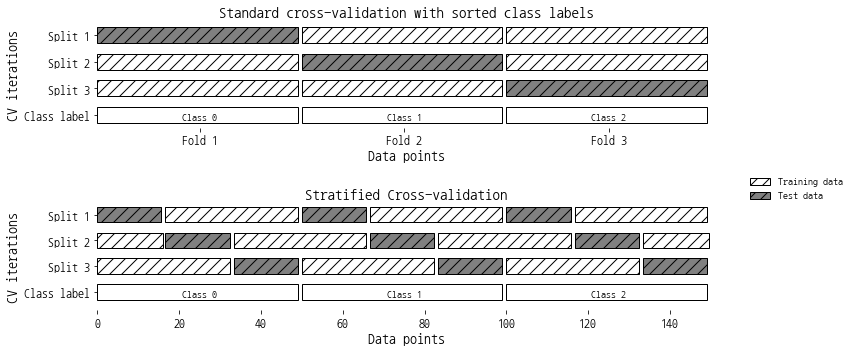

In [6]:
import mglearn
plt.figure(figsize=(12, 6))
mglearn.plots.plot_stratified_cross_validation()
plt.show()

# 클래스 레이블 순서대로 정렬된 데이터에서 기본 교차 검증과 계층별 교차 검증 비교

계층별 교차 검증은 폴드 안의 클래스 비율이 데이터셋의 클래스 비율과 같도록 데이터를 나눔  
예를 들어 샘플의 90%가 클래스 A이고 10%가 클래스 B에 속한다면, 계층별 교차 검증은 각 폴드에 클래스 A샘플이 90%, 클래스 B 샘플이 10%가 되도록 만듬  

### 교차 검증 상세 옵션  

그러나 scikit-learn에서는 cv 매개변수에 교차 검증 분할기cross-vailidation splitter를 전달함으로써 데이터를 분할할 때 더 세밀하게 제어할 수 있음  
대부분의 경우 회귀에서는 k-겹 교차 검증, 분류에서는 계층별 k-겹 교차검증의 기본값이 잘 작동함  

하지만 조금 다른 전략이 필요할 때가 있음. 예를 들어 다른사람의 결과를 재현하기 위해 분류 데이터셋에 기본 k-겹 교차 검증을 사용해야 할때임    
이렇게 하려면 먼저 model_selection에서 KFold 분할기를 임포트하고 원하는 폴드 수를 넣어 객체를 생성해야 함

In [7]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5) # KFold 객체 생성
logreg = LogisticRegression() # 모델 객체 생성

for n in [3, 5]:
    kfold = KFold(n_splits=n)
    scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
    print('n_splits={}, cross validation score: {}'.format(n, scores))

n_splits=3, cross validation score: [0. 0. 0.]
n_splits=5, cross validation score: [1.         0.93333333 0.43333333 0.96666667 0.43333333]


> n_splits=3일 때 각 폴드는 iris 데이터셋의 클래스 중 하나에 대응하므로 아무것도 학습할 수가 없음  
계층별 폴드를 만드는 대신 이문제를 해결하는 방법은  
데이터를 섞어서 샘플의 순서를 랜덤하게 만드는것(KFold의 shuffle 매개변수를 True)로 지정

데이터를 섞을 때 random_state를 고정해서 똑같은 작업을 재현할 수 있음  
그렇지 않으면 cross_val_score를 실행할 때마다 폴드가 바뀌어 매번 결과가 달라짐  

In [8]:
for n in [3, 5]:
    kfold = KFold(n_splits=n, shuffle=True, random_state=0)
    scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
    print('n_splits={}, cross validation score: {}'.format(n, scores))

n_splits=3, cross validation score: [0.9  0.96 0.96]
n_splits=5, cross validation score: [0.96666667 0.9        0.96666667 0.96666667 0.93333333]


n_splits에 상관없이 결과가 유의미하다는 것을 확인할 수가 있음